In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:


from main import *
config: Config = Config("09:30:00", "14:30:00", True, 'close', [0,1,2,3,4], 50)
back_tester_nifty = start_backtesting('BANKNIFTY', ['CE|sell|lot:1|sl:.5|primary|active|[0,0,0,0,0,0]',
                                                'PE|sell|lot:1|sl:.5|primary|active|[0,0,0,0,0,0]',
                                                # 'CE|buy|lot:1|sl:-1|secondary|active|[0,0,0,0,300,0]',
                                                # 'PE|buy|lot:1|sl:-1|secondary|active|[0,0,0,0,-300,0]'
                                                ], config,
                                        # "2020-01-14", "2022-02-18")     
                                        "2021-01-05", "2021-01-05")     
# back_tester_b_nifty = start_backtesting('BANKNIFTY')
all_trades = []
all_trades.extend(back_tester_nifty.all_trade_entries)
# all_trades.extend(back_tester_b_nifty.all_trade_entries)

back_test_trade_df = pd.DataFrame(all_trades)
back_test_trade_df.index = pd.to_datetime(back_test_trade_df.trade_date)
month_resampled = back_test_trade_df.resample('1M').sum()
year_resampled = back_test_trade_df.resample('1Y').sum()
daily_resampled = back_test_trade_df.resample('1D').sum()
daily_resampled_min = back_test_trade_df.resample('1D').sum()
print(back_test_trade_df['profit'].sum())


In [10]:
from util import get_pickle_data
back_test_trade_df=get_pickle_data('back_test_trade_df')
print(f'total count:{len(back_test_trade_df)}')
print(f'total profit {back_test_trade_df.profit.sum()}')
print("")

print(f'sl 0 hit profit {len(back_test_trade_df[back_test_trade_df.sl_hit_count==0])}')
print(f'sl 0 hit profit {back_test_trade_df[back_test_trade_df.sl_hit_count==0].profit.sum()}')
print("")


print(f'sl hit 1 count:{len(back_test_trade_df[back_test_trade_df.sl_hit_count==1])}')
print(f'sl hit 1 profit:{back_test_trade_df[back_test_trade_df.sl_hit_count==1].profit.sum()}')
print("")

# second entry
print(f're entry 1 time count:{len(back_test_trade_df[back_test_trade_df.trade_index==1])}')
print(f're entry 1 time profit count:{len(back_test_trade_df[(back_test_trade_df.trade_index==1) & (back_test_trade_df.profit>0)])}')
print(f're entry 1 time profit:{back_test_trade_df[back_test_trade_df.trade_index==1].profit.sum()}')
print("")
print(f're entry 2 time count:{len(back_test_trade_df[back_test_trade_df.trade_index==2])}')
print(f're entry 2 time profit count:{len(back_test_trade_df[(back_test_trade_df.trade_index==2) & (back_test_trade_df.profit>0)])}')
print(f're entry 2 time profit:{back_test_trade_df[back_test_trade_df.trade_index==2].profit.sum()}')
print("")
print(f're entry >2 time count:{len(back_test_trade_df[back_test_trade_df.trade_index>2])}')
print(f're entry >2 time profit count:{len(back_test_trade_df[(back_test_trade_df.trade_index>2) & (back_test_trade_df.profit>0)])}')
print(f're entry >2 time profit:{back_test_trade_df[back_test_trade_df.trade_index>2].profit.sum()}')
print("")


print(f'sl hit 2 count:{len(back_test_trade_df[back_test_trade_df.sl_hit_count==2])}')
print(f'sl hit 2 profit:{back_test_trade_df[back_test_trade_df.sl_hit_count==2].profit.sum()}')
print("")

print(f'sl hit >2 count:{len(back_test_trade_df[back_test_trade_df.sl_hit_count>2])}')
print(f'sl hit >2 profit:{back_test_trade_df[back_test_trade_df.sl_hit_count>2].profit.sum()}')
print("")

print(f'sl track hit count:{len(back_test_trade_df[(back_test_trade_df.sl_hit_count==2) & (back_test_trade_df.is_track_sl_hit==True)])}')
print(f'sl track hit profit:{back_test_trade_df[(back_test_trade_df.sl_hit_count==2) & (back_test_trade_df.is_track_sl_hit==True)].profit.sum()}')
print("")


print(f'sl hit 1,with profit: {len(back_test_trade_df[(back_test_trade_df.sl_hit_count==1) & (back_test_trade_df.day_profit>0)])}')
print(f'sl hit 1,profit: {back_test_trade_df[(back_test_trade_df.sl_hit_count==1) & (back_test_trade_df.day_profit>0)].profit.sum()}')
print(f'sl hit 1,loss: {back_test_trade_df[(back_test_trade_df.sl_hit_count==1) & (back_test_trade_df.day_profit<0)].profit.sum()}')


# print(f'sl hit 1,other leg profit: {back_test_trade_df[(back_test_trade_df.sl_hit_count==1) & (back_test_trade_df.max_spot_price_diff_perc<30)].profit.sum()}')

# print(f'other sum:{back_test_trade_df[(back_test_trade_df.other_sl_hit_profit==back_test_trade_df.other_sl_hit_profit) & (back_test_trade_df.sl_hit_count==1)].other_sl_hit_profit.sum()}')
# print(f'regular sum:{back_test_trade_df[(back_test_trade_df.other_sl_hit_profit==back_test_trade_df.other_sl_hit_profit) & (back_test_trade_df.sl_hit_count==1)].profit.sum()}')
# print(f'regular sum:{back_test_trade_df[(back_test_trade_df.sl_hit_count==2)].profit.sum()}')




total count:90
total profit -114.95000000000047

sl 0 hit profit 6
sl 0 hit profit 185.34999999999994

sl hit 1 count:48
sl hit 1 profit:1331.3499999999997



AttributeError: 'DataFrame' object has no attribute 'trade_index'

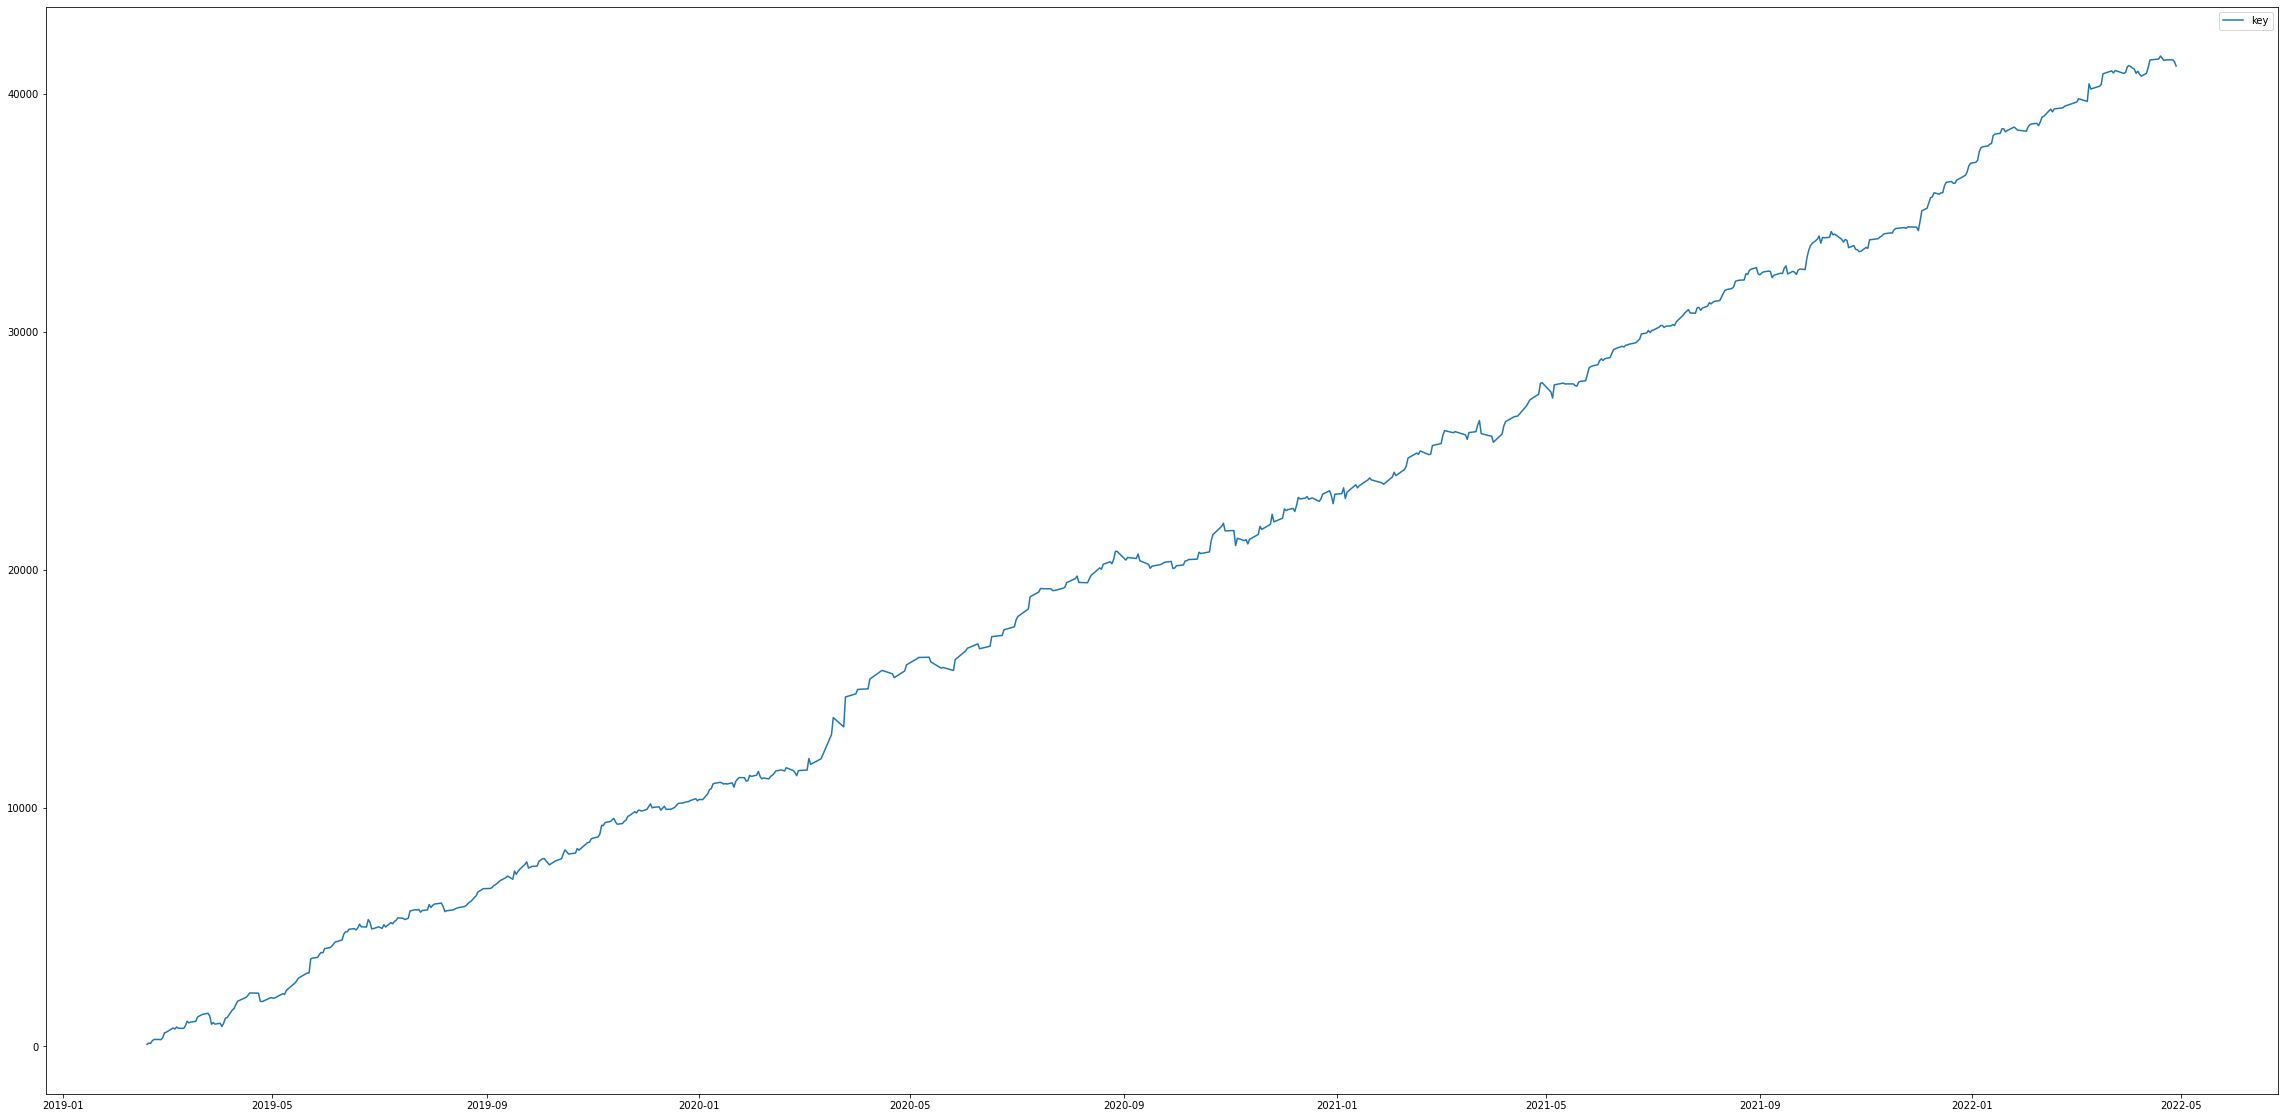

In [26]:
from util import get_pickle_data
import matplotlib.pyplot as plt

combined_profit_tracker_df=get_pickle_data('combined_profit_tracker_df')
combined_profit_tracker_df['Cumulative'] = combined_profit_tracker_df.profit.cumsum().round(2)
month_resampled = combined_profit_tracker_df.resample('1M').sum()
week_day_profit_df=get_pickle_data('week_day_profit_df')

print(f'm_d_pft:{round(combined_profit_tracker_df["profit"].mean()} std_day_profit :{round(combined_profit_tracker_df["profit"].mean()}')
    
    # result['std_day_profit'] = round(day_profit_df["profit"].std())
    # result['negative_days_count'] = len(day_profit_df[day_profit_df.profit < 0])

    # day_profit_df['Cumulative'] = day_profit_df.profit.cumsum().round(2)
    # day_profit_df['HighValue'] = day_profit_df['Cumulative'].cummax()
    # day_profit_df['DrawDown'] = day_profit_df['Cumulative'] - day_profit_df['HighValue']
    # result['drawdown'] = round(day_profit_df.sort_values('DrawDown').DrawDown.values[0])

def plot_data(df,column="profit"):
    plt.figure(figsize=(40, 20))
    # resampled_ticker_df=resample(ticker_data_dic[key],freq)
    plt.plot(df[column], label='key', alpha=1)
    plt.legend()
    plt.show()

plot_data(combined_profit_tracker_df,"Cumulative")



In [ ]:
back_test_trade_df=get_pickle_data('back_test_trade_df')
r=back_test_trade_df.resample('1D').agg({'day_profit':'min','trade_date':'min'})
# r=r[r.day_profit!=np.nan]f
r=r.dropna()
print(r.day_profit.sum())
r.to_clipboard()
r.day_profit.apply(round,args=(2,)).to_clipboard()


In [ ]:
# back_test_trade_df[(back_test_trade_df.profit<0)].groupby(['week_day'])['profit'].mean()
# back_test_trade_df[(back_test_trade_df.profit>0)].groupby(['week_day'])['profit'].mean()
print(back_test_trade_df[back_test_trade_df.prim_count==2]['profit'].sum())
print(back_test_trade_df['profit'].sum())
all_legs_df=back_test_trade_df[back_test_trade_df.prim_count==2]
all_legs_df[['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
# back_test_trade_df.trade_date1=back_test_trade_df.trade_date
# back_test_trade_df.rename(columns={'trade_date':'trade_date1'})
# back_test_trade_df[['profit','trade_date1']].groupby(['trade_date1']).agg(['mean','sum','count'])
# back_test_trade_df[['profit']].groupby(back_test_trade_df.index).agg(['mean','sum','count'])
# aggregated = df.groupby('A').sum()['values']
# aggregated.name = 'sum_values_A'
# df.join(aggregated,on='A')
# hello=pd.DataFrame(values)

# len(back_test_trade_df[(back_test_trade_df.week_day==4) & (back_test_trade_df.profit<0)])

In [ ]:
import math
# print(len(back_test_trade_df[(back_test_trade_df.prim_count==2) &(back_test_trade_df.sec_count==2)]))
# print(len(back_test_trade_df))
back_test_trade_df=get_pickle_data('back_test_trade_df')
r=back_test_trade_df.resample('1D').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max','week_day':'min'})
r=r[r.profit!=0]
print(f'mean:{r["profit"].mean()} std:{r["profit"].std()} negative count:{len(r[r.profit<0])}')
rmonth=back_test_trade_df.resample('M').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max'})
# back_test_trade_df.index
print(f'profitable entry count:{len(r[r.profit>0])}')
print(f'non profitable entry count:{len(r[r.profit<0])}')
print(f'non profitable entry count:{len(r[(r.profit<0) & (r.week_day==3)])}')

print(f'all entries:{len(r[r.trade_date==r.trade_date])}')
print(f'count zero sl hit:{len(r[(r.sl_hit_count==0)])}')
print(f'zero sl hit profit:{r[(r.sl_hit_count==0)]["profit"].sum()}')
print(f'count one sl hit:{len(r[(r.sl_hit_count==1)])}')
print(f'one sl hit profit:{r[(r.sl_hit_count==1)]["profit"].sum()}')
print(f'one sl hit profitable entries:{len(r[(r.sl_hit_count==1) & (r.profit>0)])}')
print(f'other sum:{r[(r.sl_hit_count==1)]["other_sl_hit"].sum()}')
print(f'count two sl hit:{len(r[(r.sl_hit_count==2)])}')
print(f'two sl hit profit:{r[(r.sl_hit_count==2)]["profit"].sum()}')
print(f'two sl hit profitable entries:{len(r[(r.sl_hit_count==2) & (r.profit>0)])}')
print(len(back_test_trade_df[back_test_trade_df.day_profit>0]))
print(len(back_test_trade_df[back_test_trade_df.day_profit<0]))

print(len(back_test_trade_df[back_test_trade_df.sl_hit_count==2]))
print(len(back_test_trade_df[(back_test_trade_df.day_profit<0) &(back_test_trade_df.sl_hit_count==2)]))

# r[['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
# r[r.profit<0][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
r[r.sl_hit_count==2][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
# r[r.sl_hit_count==0][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
# r[r.sl_hit_count==1][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])




In [ ]:
import pandas as pd

file_name="all_trades_df"
# file_name="back_df_1130"
# file_name="back_df_0920"

all_trades_df=get_pickle_data(file_name)
r=all_trades_df.resample('1D').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max','week_day':'min'})
r=r[r.profit!=0]
if "all" in file_name:
    r.profit=r.profit/2
r.index = pd.to_datetime(r.trade_date)
rmonth=r.resample('M').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max'})
print(f'mean:{r["profit"].mean()} std:{r["profit"].std()} negative count:{len(r[r.profit<0])}')
r[['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
print(f'profit:{r.profit.sum()}')
r['Cumulative'] = r.profit.cumsum().round(2)
r['HighValue'] = r['Cumulative'].cummax()
r['Drawdown'] = r['Cumulative'] - r['HighValue']
r['loss']=r['profit']<0
r['Streak'] = r['loss'].groupby((r['loss'] != r['loss'].shift()).cumsum()).cumcount() + 1


r1=get_pickle_data("back_df_0920").resample('1D').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max','week_day':'min'})
r2=get_pickle_data("back_df_1130").resample('1D').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max','week_day':'min'})
merge=pd.merge(r1,r2, how='inner', left_index=True, right_index=True)
merge['profit_x'].corr(merge['profit_y'])

r[['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
r[r.sl_hit_count==2][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
r[r.profit<0][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])
# r[r.profit>0][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])

# correl_data = [r1["profit"], r2["profit"]]
# headers = ["r1", "r2"]

# df3 = pd.concat(correl_data, axis=1, keys=headers)


# r[r.sl_hit_count==2][['profit','week_day']].groupby(['week_day']).agg(['mean','sum','count'])

In [ ]:
back_test_trade_df=get_pickle_data('back_test_trade_df')
r=back_test_trade_df.resample('1D').agg({'profit':'sum','trade_date':'min','sl_hit_count':'min','other_sl_hit':'max','week_day':'min','max_profit_reached':'min'})
print(r.profit.mean())
print(r.profit.sum())
r=r[r.profit!=0]
r.to_clipboard()

In [ ]:

threshold=70
print(f'total counts:{len(r)}')
print(f'total counts:{len(r[r.profit>0])}')
print(f'total counts with max reached:{len(r[(r.profit>0) & (r.max_profit_reached>50)])}')
print(f'failure counts:{len(r[r.profit<0])}')
print(f'failure counts with max reached:{len(r[(r.profit<0) & (r.max_profit_reached>40)])}')
print(f'max reached:{len(r[ (r.max_profit_reached>threshold)])}')
print(f'max reached:{len(r[ (r.max_profit_reached<threshold)])}')
print(f'max reached mean:{r[ (r.max_profit_reached<threshold)].profit.mean()}')
gt_count=len(r[ (r.max_profit_reached>threshold)])
lt_count=len(r[ (r.max_profit_reached<threshold)])
mean_gt=float(r[ (r.max_profit_reached>threshold)].profit.mean())
lt_profit=float(r[ (r.max_profit_reached<threshold)].profit.sum())
gt_proit=threshold*gt_count
# lt_proit=lt_count*mean_lt
# print(mean_gt,mean_lt,gt_count,lt_count)
# print(f'gt:{gt_proit} lt:{lt_proit} final:{gt_proit+lt_proit}')
print(f'gt:{gt_proit} lt:{lt_profit} final:{gt_proit+lt_profit}')
print(r.profit.sum())


In [ ]:
from util import get_pickle_data

trade_data_analysis_df=get_pickle_data('trade_data_analysis_df')
trade_data_analysis_offset_df=get_pickle_data('trade_data_analysis_offset_df')
trade_data_analysis_2_df=get_pickle_data('trade_data_analysis_2_df')
trade_data_single_entry_analysis_df=get_pickle_data('trade_data_single_entry_analysis_df')
week_day_df=get_pickle_data('week_day_df')
week_day_0_df=get_pickle_data('week_day_df_0')
week_day_0_df=get_pickle_data('week_day_0_df')
week_day_2_df=get_pickle_data('week_day_2_df')


In [9]:
from util import get_pickle_data

every_minute_df=get_pickle_data('every_minute_df')
all_atm_df=get_pickle_data('all_atm_df')
df_0920_atm_strike=get_pickle_data('df_0920_atm_strike')
straddle_df_0920=get_pickle_data('_0920_straddle_df')
nifty_spot_df=get_pickle_data('nifty_spot_df')
day_strike_index_list=get_pickle_data('day_strike_index_list')
day_profit_df=get_pickle_data('day_strike_index_list')


In [14]:
import pandas as pd
day_profit_df.index = pd.to_datetime(day_profit_df.date)
rmonth=day_profit_df.resample('M').agg({'profit':'sum','date':'min'})
rweek=day_profit_df.resample('W').agg({'profit':'sum','date':'min'})


In [8]:
print(len(every_minute_df))
print(len(every_minute_df[every_minute_df.minute=="09:15:00"]))
print(len(day_strike_index_list))
print(len(straddle_df_0920))
print(len(every_minute_df[every_minute_df.strike_ticker_symbol.str.endswith("CE")]))

3423104
9104
4552
299296
1711552


In [ ]:
from option_util import round_nearest

nifty_spot_df=nifty_spot_df[nifty_spot_df.spot!=-1]
print(len(nifty_spot_df.groupby(['day'])))
nifty_spot_df['r_spot_price']=nifty_spot_df['spot'].round()
nifty_spot_df['r_strike_price']=(nifty_spot_df['r_spot_price']).apply(round_nearest,args=(100,))

nifty_strike_df=nifty_spot_df[['r_strike_price', 'day']].groupby(['day','r_strike_price'])['r_strike_price'].agg(['min','max','first','count'])
print(len(nifty_strike_df))


nifty_group_df=nifty_spot_df[['spot', 'day']].groupby(['day'])['spot'].agg(['min','max','first'])
nifty_group_df['min_change_perc']=((nifty_group_df['min']-nifty_group_df['first'])/nifty_group_df['first'])*100
nifty_group_df['min_change_perc']=nifty_group_df['min_change_perc'].abs()
nifty_group_df['max_change_perc']=((nifty_group_df['max']-nifty_group_df['first'])/nifty_group_df['first'])*100
nifty_group_df["change_perc"] = nifty_group_df[["min_change_perc", "max_change_perc"]].max(axis=1)

print(f'>3:{len(nifty_group_df[nifty_group_df.change_perc>3])}')

In [ ]:
import numpy as np
count_a_vals = df_0920_atm_strike['value'].values
diffs_a = count_a_vals[:-1] - count_a_vals[1:]
hello=np.append([np.nan],diffs_a)
print(len(hello))
df_0920_atm_strike['eee']=hello



In [ ]:
from util import get_pickle_data, write_pickle_data

portfolio_df=get_pickle_data('portfolio_df')